   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


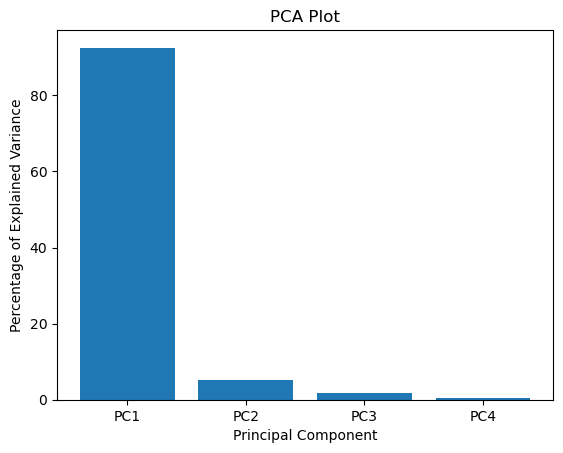

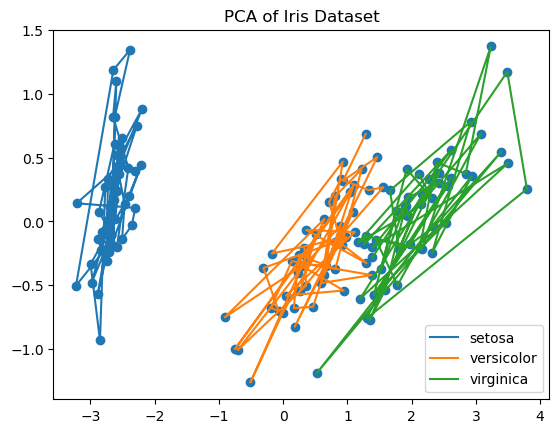

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Generating Data Frame
data = pd.read_csv('iris_data.csv')

print(data.head())
print(data.shape)

# Time for PCA
scaled_data = data.drop('species',axis=1)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plots
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

# PC1 and PC2 Plots
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df['species'] = data['species']
plt.figure(2)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA of Iris Dataset')
groups = pca_df.groupby('species')
for name, group in groups:
    plt.plot(group.PC1, group.PC2, markersize = 5, label=name)
plt.legend()
plt.show()

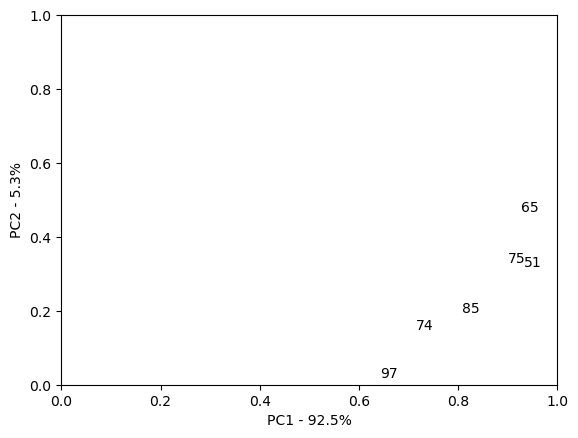

NameError: name 'grades' is not defined

In [2]:
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))


for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Determine which grades had the biggest influence on PC1
loading_scores = pd.Series(pca.components_[0], index=grades)

## Sort the scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# Show the names of the grades
top_4_grades = sorted_loading_scores[0:10].index.values
print(loading_scores[top_4_grades])